# 🌡️ 연도별 7월 폭염 데이터 분석 실습

이 노트북은 여러 연도의 7월 폭염 데이터를 바탕으로 **연도별 평균 최고기온의 변화**를 분석하는 실습 예제입니다.

## ✅ 실습 목표
- 폭염 관련 `.csv` 데이터를 연도별로 통합한다.
- `pandas`로 날짜 데이터를 처리하고 연도별로 그룹화한다.
- `matplotlib`을 이용해 시계열 그래프로 시각화한다.

---

## 🔧 Step 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## 📂 Step 2. 데이터 파일 불러오기 및 연도 통합

In [2]:
# 변환된 폭염 CSV 파일 리스트
file_paths = [
    "heatwave_2021_07.csv",
    "heatwave_2022_07.csv",
    "heatwave_2023_07.csv",
    "heatwave_2024_07.csv",
    "heatwave_2025_07.csv"
]

# 연도별 통합 데이터프레임 생성
combined_df = pd.DataFrame()

for path in file_paths:
    df = pd.read_csv(path, encoding="utf-8-sig")
    df.columns = df.columns.str.strip()  # 공백 제거
    if '일시' in df.columns:
        df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
        df['연도'] = df['일시'].dt.year
        combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df.head() # 5개의 연도별 데이터셋 csv 파일을 통합하여 dataframe 으로 변환 후 앞부분만 출력

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계),연도
0,2021-07-01,북강릉(104),X,28.1,26.4,21.8,18.1,86.8,X,,X,높음,2021
1,2021-07-01,동해(106),X,27.4,25.2,21.9,19.1,90.0,X,,X,매우높음,2021
2,2021-07-01,서울(108),X,31.3,31.0,26.3,21.4,70.9,O,관심,X,매우높음,2021
3,2021-07-01,인천(112),X,29.9,29.3,25.6,21.8,67.9,X,관심,X,매우높음,2021
4,2021-07-01,원주(114),X,31.0,31.3,25.0,19.0,70.0,X,관심,X,높음,2021


## 📊 Step 3. 연도별 평균 최고기온 계산

In [3]:
# 최고기온 열이 존재하는지 확인하고 평균 계산
if '최고기온(°C)' in combined_df.columns:
    grouped = combined_df.groupby('연도')['최고기온(°C)'].mean().reset_index() #연도별 7월 최고기온 열의 평균값 계산
else:
    print("⚠️ '최고기온(°C)' 열이 존재하지 않습니다.")
grouped.head() # 계산된 dataframe의 앞부분만 출력
'''
  출력해보면, 2025년이 제일 덥네요 정말...
'''

'\n  출력해보면, 2025년이 제일 덥네요 정말...\n'

## 📈 Step 4. 시계열 그래프 시각화

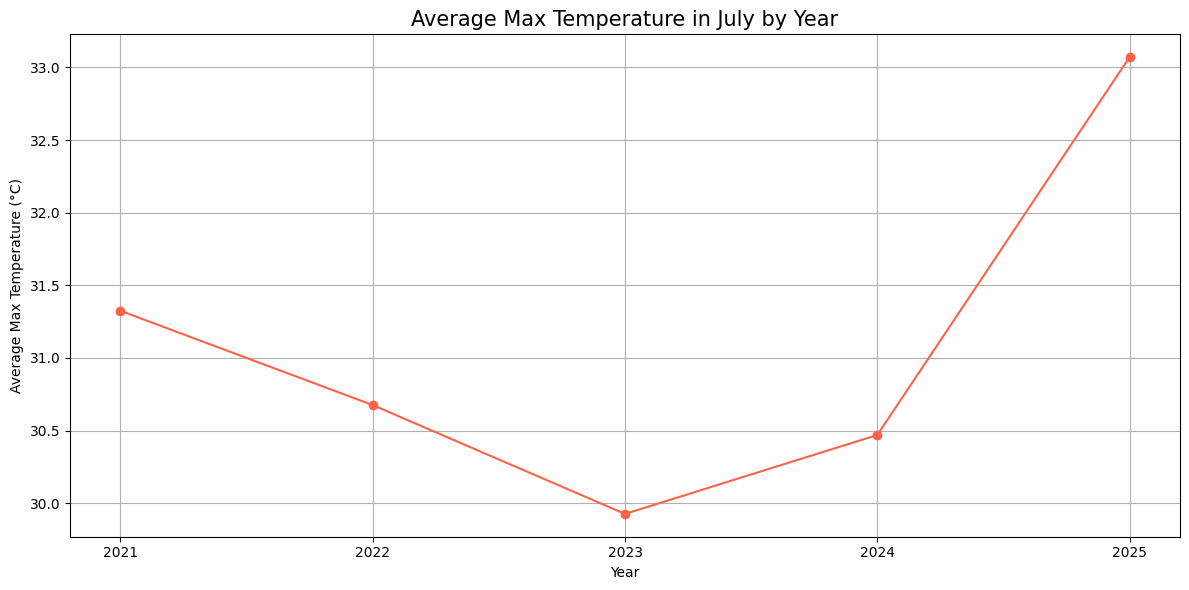

In [4]:
# 연도별 평균 최고기온 시각화 (영문 버전)
plt.figure(figsize=(12, 6))
plt.plot(grouped['연도'], grouped['최고기온(°C)'], marker='o', color='tomato')
plt.title("Average Max Temperature in July by Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Max Temperature (°C)")
plt.xticks(range(2021, 2026))
plt.grid(True)
plt.tight_layout()
plt.show()

     연도  총일수  폭염일수    비율(%)
0  2021   31  1760   5677.4
1  2022   31  1180   3806.5
2  2023   31   855   2758.1
3  2024   31  1178   3800.0
4  2025   14  1573  11235.7


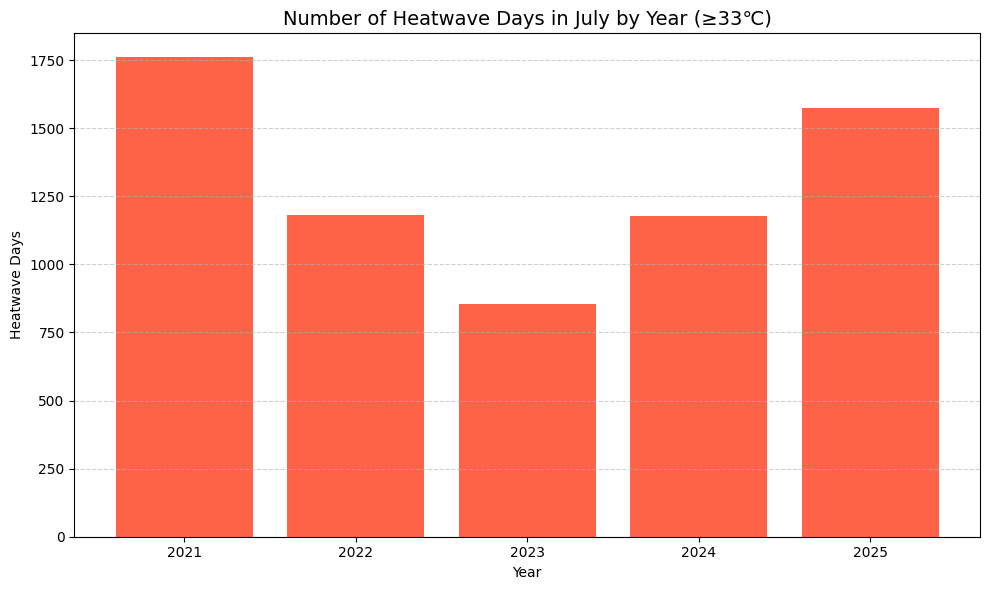

In [11]:
# 폭염 기준 (33℃ 이상)
threshold = 33

# 연도별 폭염일수 계산
heatwave_days = combined_df[combined_df['최고기온(°C)'] >= threshold]
heatwave_count = heatwave_days.groupby('연도').size().reset_index(name="폭염일수")

# 연도별 총일수 (매년 7월 일수만 계산)
days_per_year = combined_df.groupby('연도')['일시'].nunique().reset_index(name="총일수")

# 합치기
heatwave_summary = pd.merge(days_per_year, heatwave_count, on="연도", how="left").fillna(0)
heatwave_summary["폭염일수"] = heatwave_summary["폭염일수"].astype(int)
heatwave_summary["비율(%)"] = (heatwave_summary["폭염일수"] / heatwave_summary["총일수"] * 100).round(1)

print(heatwave_summary)

# ✅ 시각화 : 연도별 폭염일수만 막대그래프로
plt.figure(figsize=(10,6))
plt.bar(heatwave_summary['연도'], heatwave_summary["폭염일수"], color="tomato")
plt.title("Number of Heatwave Days in July by Year (≥33℃)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Heatwave Days")
plt.xticks(heatwave_summary['연도'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




     연도       폭염일수
0  2021  10.864198
1  2022   7.283951
2  2023   5.277778
3  2024   5.166667
4  2025   7.222222


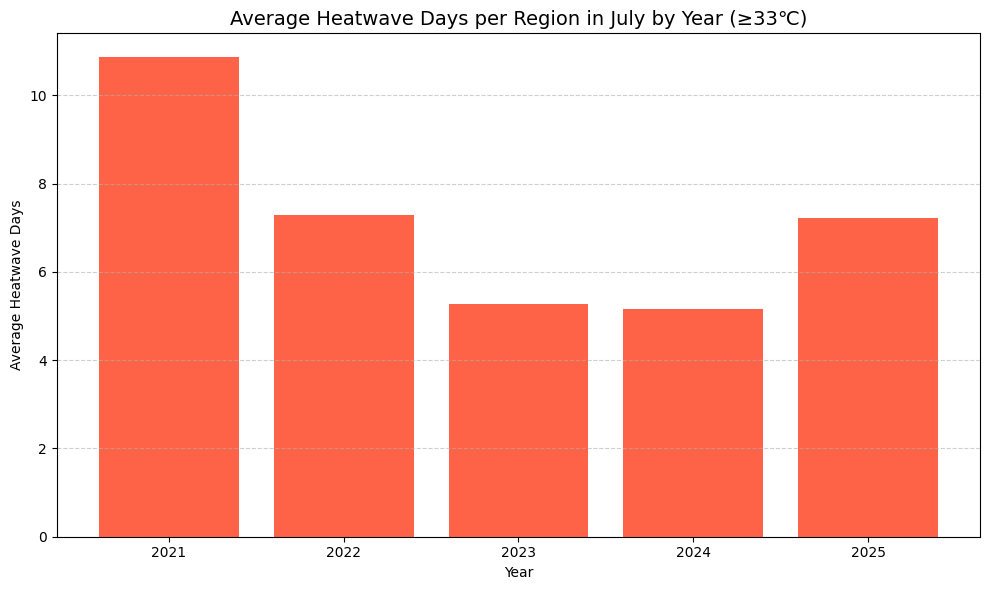

In [13]:
# 폭염 기준
threshold = 33

# 지역별, 연도별 폭염일수 계산
heatwave_days = combined_df[combined_df['최고기온(°C)'] >= threshold]
heatwave_count = heatwave_days.groupby(['연도', '지점'])['일시'].nunique().reset_index(name="폭염일수")

# 지역별 총일수 (7월 일수, 대부분 31일)
days_per_region = combined_df.groupby(['연도', '지점'])['일시'].nunique().reset_index(name="총일수")

# 합치기
heatwave_summary = pd.merge(days_per_region, heatwave_count, on=['연도', '지점'], how='left').fillna(0)
heatwave_summary["폭염일수"] = heatwave_summary["폭염일수"].astype(int)

# 연도별 지역 평균 폭염일수
avg_heatwave_by_year = heatwave_summary.groupby('연도')['폭염일수'].mean().reset_index()

print(avg_heatwave_by_year)

# 시각화
plt.figure(figsize=(10,6))
plt.bar(avg_heatwave_by_year['연도'], avg_heatwave_by_year["폭염일수"], color="tomato")
plt.title("Average Heatwave Days per Region in July by Year (≥33℃)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Heatwave Days")
plt.xticks(avg_heatwave_by_year['연도'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🔍 추가 탐구 과제
- 폭염 여부(`폭염여부(O/X)`)가 'O'인 날의 개수를 연도별로 비교해보세요.
- 열대야 발생 여부(`열대야(O/X)`)의 빈도를 연도별로 확인해보세요.
- `폭염특보(O/X)` 비율이나 `자외선지수(단계)`의 평균 등도 함께 분석할 수 있습니다.